# S11T01 - Aprenentatge no supervisat Clustering
Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.

## - Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means.
### <font color='blue'>- Importing data and modules

In [3]:
#importing modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#importing data
delays = pd.read_csv(r'DelayedFlights.csv')

#cleaning dataframe
drp = ['Unnamed: 0','FlightNum','TailNum','Year','Cancelled','CancellationCode','Diverted']
delays.drop(columns=drp, inplace=True, axis=1)
delays.dropna(inplace=True) 
print("Shape: ", delays.shape)
print("Total NaN values: ", delays.isna().sum().sum())

pd.set_option('max_columns', None)
delays.head(5)

Shape:  (1247488, 23)
Total NaN values:  0


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
7,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
9,1,3,4,1452.0,1425,1640.0,1625,WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
11,1,3,4,1323.0,1255,1526.0,1510,WN,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


### <font color='blue'> - Dummies

In [4]:
#picking the discrete parameters
cats = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin','Dest']
cats = delays.loc[:, delays.columns.isin(cats)].columns

#converting the numeric columns into str to be able to get their dummy versions
delays[['Month', 'DayofMonth', 'DayOfWeek']] = delays[['Month', 'DayofMonth', 'DayOfWeek']].astype(str)

#dummy creation
dummy = pd.get_dummies(delays[cats])

#concatenate to the main dataset
delays_d = pd.concat([delays,dummy], axis=1)
delays_d.drop(columns=cats, inplace=True, axis=1)
print(delays_d.shape)
delays_d.sample(5, random_state=42)

(1247488, 690)


,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,DayofMonth_1,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_2,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_3,DayofMonth_30,DayofMonth_31,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Ori

### <font color='blue'>- Sampling

In [5]:
delays_d_s = delays_d.sample(1000, random_state=42)    

### <font color='blue'>- Pipeline Construction (Scaling + PCA + K-Means)
<font color='blue'>We'll build a Pipeline embedding the Scalation and PCA of the dataset. For the Scalation we'll first have to check wether the data follows a normal distribution or not, in order to decide the Scaler method.

In [6]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(delays_d_s)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.058, p=0.000
Probably not Gaussian


C:\Users\pacressa\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<font color='blue'>The results are not confident about the dataset being close to a Gaussian distribution. In that case we won't use the StandardScaler() and will use the <b>MinMaxScaler()</b> instead. Let's code our Pipeline:

In [7]:
#preparing scaler
preprocessor = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=2, random_state=42))])

#Initializing K-Means Model
clusterer = Pipeline([('kmeans', KMeans(n_clusters=9,        
                                       init='k-means++',
                                       n_init=50,
                                       max_iter=500,
                                       random_state=42))])

#embedding all in the Pipeline chain
pipe = Pipeline([('preprocessor', preprocessor),('clusterer', clusterer)])

#applying the pipeline to our dataset
pipe.fit(delays_d_s)

delays_d_s_np = pd.DataFrame(pipe["preprocessor"].transform(delays_d_s), columns=["component_1", "component_2"])
delays_d_s_np.head()

,component_1,component_2
0,-0.588704,-0.426863
1,0.001002,0.429680
2,-0.203708,-0.008418
3,-0.152706,0.181279
4,-0.451863,-0.555921


### <font color='blue'> - Accessing Pipeline data to calculate Silhouette Score

In [8]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(delays_d_s_np, predicted_labels))
print("Clusters remarkably separated")

0.45442921887638454
Clusters remarkably separated


<font color='blue'>As we can see the Silhouette Score is close to 0.5, quite close to 1. This means the separation between clusters is visible and the model created cluster very differentiated. <br>We can see the distributions of clusters in the following plot:
    
### <font color='blue'>- Plotting K-Means

C:\Users\pacressa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


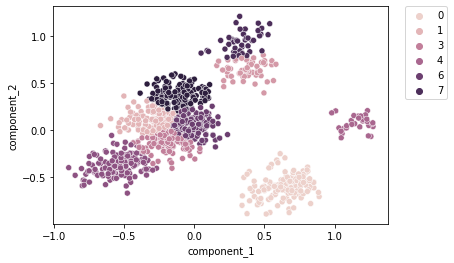

In [9]:
x = delays_d_s_np.copy()
x['predicted_cluster'] = predicted_labels

sns.scatterplot("component_1", "component_2", data=x, hue="predicted_cluster")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

<font color='blue'>However, in order to be able to plot the dataset we cheated a bit by limiting the features to a number of 2 with PCA. Let's figure out what's the optimal number of features considering the explained variance:

Text(175, 0.005, 'V')

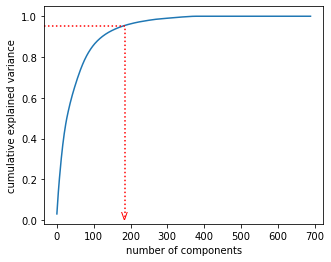

In [10]:
#normalizing again the previous dataframe
scaler = MinMaxScaler()
delays_d_s_n = pd.DataFrame(scaler.fit_transform(delays_d_s))

#plotting PCA
from sklearn.decomposition import PCA

plt.figure(figsize=(5,4))
pca = PCA().fit(delays_d_s_n)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.95, 0 ,0.29, ls=':', c='red')    # minimum variance
plt.axvline(185, 0.03 ,0.90, ls=':', c='red')    # minimum variance
plt.annotate("V", xy=(175,0.005), color='red')

<font color='blue'>Apparently the optimal number of features (95% variance) is close to 200. Let's reduce the dataframe according to this result:

In [11]:
#applying
pca = PCA(.95)
principalComponents = pca.fit_transform(delays_d_s_n)
delays_d_s_np = pd.DataFrame(data = principalComponents)

print(delays_d_s_np.shape)
delays_d_s_np.head(5)

(1000, 178)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,-0.578397,-0.427922,0.546170,0.181583,0.330410,-0.117229,0.647322,0.079314,0.000535,0.284880,0.056327,-0.196265,-0.319094,-0.036711,-0.049409,0.444523,0.069697,0.318606,0.003113,0.096940,-0.205884,0.681508,-0.352356,-0.073288,0.018613,-0.081913,-0.370948,-0.070110,-0.299627,-0.208199,0.068775,0.014824,0.386813,-0.248873,0.411243,-0.240670,-0.029661,-0.248515,-0.093245,0.010530,-0.049719,0.147758,-0.214551,-0.151322,-0.081957,-0.175853,0.082846,-0.254189,-0.329447,-0.159969,0.283464,-0.138640,-0.162859,0.229196,-0.315540,0.076437,0.175864,-0.284257,-0.031612,-0.074166,-0.025438,0.402184,0.097877,0.241738,-0.184465,-0.102969,-0.106183,0.132412,-0.173262,-0.094592,-0.004667,-0.087882,-0.005376,-0.112706,0.156736,0.008823,-0.248367,0.141353,0.066700,-0.053718,-0.046559,0.020925,0.128205,0.103142,0.008767,-0.188221,0.036329,0.097732,0.044246,-0.159047,0.048478,-0.100117,-0.079945,0.056806,0.102944,-0.014555,-0.033889,-0.127115,0.016164,-0.129139,-0.072279,0.059245,-0.012795,-0.065042,-0.013601,-0.011780,-0.074758,-0.003564,-0.059489,-0.227881,0.001006,-0.015950,0.132373,0.045283,0.003600,-0.042807,0.123927,-0.030488,-0.060235,-0.026698,0.022469,0.022262,-0.080164,-0.032904,0.001211,-0.042820,0.110964,-0.042435,-0.065401,0.058040,-0.001187,0.008357,-0.187801,0.175707,-0.016008,-0.014642,0.023706,-0.032862,-0.003069,0.073430,-0.177177,0.044324,0.074088,0.045837,-0.170858,0.262117,-0.189931,-0.017158,0.063192,0.078756,-0.141866,0.096991,-0.236221,0.304701,0.083904,-0.207492,-0.339374,0.082015,-0.014854,0.072736,-0.126214,0.252718,-0.059022,-0.026147,0.017551,0.145558,-0.075634,-0.001559,0.026265,0.066405,-0.049858,0.010682,-0.004504,-0.044579,-0.001586,-0.005493,0.025697,0.057737
1,0.002483,0.430404,0.116488,-0.637544,-0.515261,-0.135476,-0.114508,-0.483690,0.001049,-0.305866,-0.151675,0.294577,-0.429408,-0.752557,-0.308167,-0.320535,-0.107166,-0.028784,-0.245220,0.093575,-0.254620,0.352509,0.501750,-0.436526,0.172532,0.075241,0.007738,0.114442,0.063999,0.375749,-0.150740,0.187823,-0.018847,0.021039,-0.176347,0.002542,0.105882,-0.084252,0.297336,0.237860,-0.498311,0.069134,-0.259239,0.276354,-0.421462,-0.263705,-0.202926,-0.004617,0.359660,0.177792,-0.213446,-0.005843,0.189878,0.397401,0.128655,-0.094006,0.372559,-0.020566,-0.136363,-0.326638,-0.181962,0.380091,0.020070,-0.376383,-0.167194,0.006165,0.049069,0.124173,-0.002486,-0.235260,-0.151960,0.090861,-0.137678,-0.181859,0.221429,-0.099657,0.098371,0.021004,0.136467,-0.073382,0.106108,-0.046149,-0.067949,-0.071568,-0.028579,0.113547,-0.130900,0.037663,-0.111809,-0.107637,-0.049008,0.014448,-0.194590,-0.083077,0.076189,-0.021716,-0.109273,-0.050442,0.295704,-0.071960,0.088511,0.149952,0.072776,-0.335702,-0.037146,0.126249,0.109975,-0.078727,0.064943,0.009635,-0.111662,-0.009937,0.019092,0.106884,-0.241816,0.114394,-0.096504,-0.216785,0.059591,-0.069871,0.174190,0.197360,0.035243,-0.134510,-0.009961,0.082074,-0.115022,-0.052619,-0.047865,-0.099152,0.025926,0.046843,0.048763,0.008721,0.037566,-0.061150,0.069255,-0.031862,-0.067186,0.024046,0.009528,0.076568,-0.078290,0.010546,0.016190,-0.027829,0.002783,-0.001252,0.080803,0.057569,-0.033243,-0.000164,-0.027125,-0.018417,-0.038923,-0.015671,0.029631,-0.013592,-0.013759,-0.043632,-0.014104,-0.047787,-0.044990,-0.009660,-0.015938,0.013061,-0.013169,0.018486,0.001856,-0.020061,-0.032877,0.006883,-0.003699,-0.041156,-0.039697,-0.007602,0.002921,0

<font color='blue'>And now we can train the model again to see the Silhouette Score:

In [12]:
#training K-Means model
model = KMeans(n_clusters=9, init='k-means++', n_init=50, max_iter=500, random_state=42)
model.fit(delays_d_s_np)
k_predicted_labels = model.labels_

#calculating new Silhouette Score
print(silhouette_score(delays_d_s_np, k_predicted_labels))
print("Clusters vaguely separated")

0.06323315301442256
Clusters vaguely separated


<font color='blue'>As we are getting a Silhouette Score just slightly above 0, we can infer that the clusters are not clearly separated from each other, but one could guess their limits as they are not extremely overlapping. This is normal because as soon as we add more feature the Silhouette score always reduces. 

## - Exercici 2
Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

### <font color='blue'>- Determining number of clusters
<font color='blue'>For this exercise we'll use the model Agglomerative Hierarchical Clustering, which follows a bottom-up system to create clusters. <br>It's not mandatory but we can try to guess the optimal number of clusters with a Dendrogram to get better results:

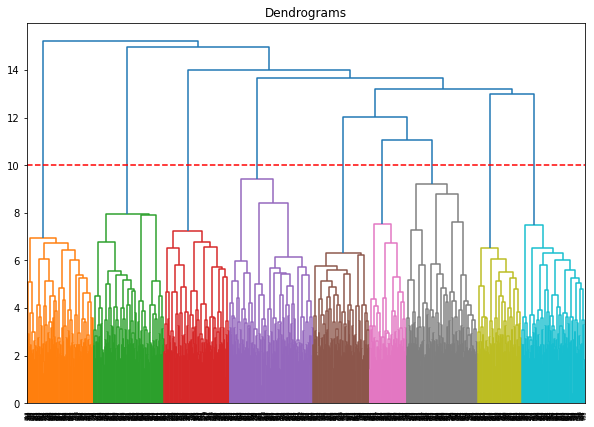

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(delays_d_s_np, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

<font color='blue'>If we cut at threshold 10 which has the vertical line with maximum distance, we can infer that the optimal number of clusters is 9. Let's then train our hierarchical model with this parameter.
    
### <font color='blue'>-Training Agglomerative Hierarchical Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=9)
cluster.fit_predict(delays_d_s_np)

h_predicted_labels = cluster.labels_
print(silhouette_score(delays_d_s_np, h_predicted_labels))
print("Clusters vaguely separated")

0.04060405566199456
Clusters vaguely separated


<font color='blue'>This time the Silhouette Score is again close to 0, though it's slightly lower than previously with the other K-Means model. This means both models are not ideal to predict clusters clearly, but both can give an estimation of the clusters since their data is not extremely overlapped. Between the two models, K-Means continues to be higher in accuracy, hence it would be the preferrable option. Probably because the data is distributed in clusters with aproximately circular shapes, which is one of the strong points of K-Means.